In [2]:
import pandas as pd
import json

In [3]:
file_path_train = './classification_frames/annotations_train.json'
with open(file_path_train, 'r') as file:
    data = json.load(file)

type(data)

dict

In [4]:
rows = []
for image_path, annotations in data.items():
    row = annotations  
    row['image_path'] = image_path 
    rows.append(row)

In [5]:
df = pd.DataFrame(rows)

In [6]:
df.head()

,driver_state,landmarks,image_path
0,alert,"[[49, 122], [154, 127], [88, 183], [54, 241], ...",./classification_frames/P1043127_720/frame461.jpg
1,alert,"[[47, 122], [146, 125], [81, 175], [50, 238], ...",./classification_frames/P1043127_720/frame226.jpg
2,alert,"[[64, 127], [172, 139], [114, 197], [61, 254],...",./classification_frames/P1043127_720/frame336.jpg
3,alert,"[[31, 115], [119, 101], [48, 143], [37, 217], ...",./classification_frames/P1043127_720/frame428.jpg
4,alert,"[[89, 126], [190, 148], [145, 193], [77, 241],...",./classification_frames/P1043127_720/frame68.jpg


In [7]:
df['driver_state'].value_counts()

driver_state
alert         35483
microsleep     8074
yawning        4770
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [9]:
def plot_landmarks(image_path, landmarks):
    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)


    if image_array.dtype != np.uint8:
        image_array = (image_array * 255).astype(np.uint8)
    plt.imshow(image_array)
    plt.axis('off')
    for x, y in landmarks:
        plt.plot(x, y, 'ro') 


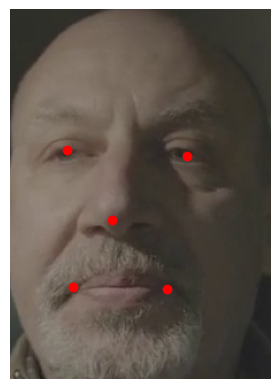

In [10]:
image_path = './classification_frames/P1043127_720/frame461.jpg' 
landmarks = [[49, 122], [154, 127], [88, 183], [54, 241], [136, 243]]
plot_landmarks(image_path, landmarks)

In [11]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [12]:
limited_df = df_shuffled.groupby('driver_state').head(3000)

In [13]:
limited_df.driver_state.value_counts()

driver_state
alert         3000
yawning       3000
microsleep    3000
Name: count, dtype: int64

In [14]:
limited_df.head()

,driver_state,landmarks,image_path
0,alert,"[[61, 100], [146, 87], [120, 138], [87, 204], ...",./classification_frames/P1042757_720/frame3401...
1,alert,"[[82, 100], [155, 96], [149, 140], [93, 187], ...",./classification_frames/P1042797_720/frame2830...
2,alert,"[[64, 134], [180, 143], [116, 200], [68, 268],...",./classification_frames/P1043087_720/frame64.jpg
3,alert,"[[42, 95], [133, 97], [85, 136], [48, 191], [1...",./classification_frames/P1043067_720/frame146.jpg
4,alert,"[[56, 89], [134, 80], [104, 112], [66, 165], [...",./classification_frames/P1042767_720/frame1351...


In [15]:
def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size  # Returns a tuple (width, height)
    except IOError:
        print(f"Error opening image {image_path}")
        return None, None

In [16]:
limited_df['width'], limited_df['height'] = zip(*limited_df['image_path'].apply(get_image_dimensions))

C:\Users\marja\AppData\Local\Temp\ipykernel_15748\1225120789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_df['width'], limited_df['height'] = zip(*limited_df['image_path'].apply(get_image_dimensions))
C:\Users\marja\AppData\Local\Temp\ipykernel_15748\1225120789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_df['width'], limited_df['height'] = zip(*limited_df['image_path'].apply(get_image_dimensions))


In [17]:
limited_df.head()

,driver_state,landmarks,image_path,width,height
0,alert,"[[61, 100], [146, 87], [120, 138], [87, 204], ...",./classification_frames/P1042757_720/frame3401...,190,263
1,alert,"[[82, 100], [155, 96], [149, 140], [93, 187], ...",./classification_frames/P1042797_720/frame2830...,178,260
2,alert,"[[64, 134], [180, 143], [116, 200], [68, 268],...",./classification_frames/P1043087_720/frame64.jpg,247,344
3,alert,"[[42, 95], [133, 97], [85, 136], [48, 191], [1...",./classification_frames/P1043067_720/frame146.jpg,182,255
4,alert,"[[56, 89], [134, 80], [104, 112], [66, 165], [...",./classification_frames/P1042767_720/frame1351...,177,236


In [89]:
image_size = (224,224)

In [91]:
from PIL import Image
def preprocess_image(image_path, target_size=image_size):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = img.astype('float32') 
    img //= 255.0  # Normalize to [0, 1]
    return img

In [90]:
def preprocess_landmarks(landmarks, num_landmarks=5):
    
    flattened = np.array(landmarks).flatten()
    
    normalized = flattened / 224.0
    return normalized

In [92]:
images = np.array([preprocess_image(path) for path in limited_df['image_path']])

In [93]:
landmarks = np.array([preprocess_landmarks(lm) for lm in limited_df['landmarks']])

In [23]:
from tensorflow.keras.utils import to_categorical

In [23]:
label_mapping = {'alert': 0, 'yawning': 1, 'microsleep': 2}  
labels = limited_df['driver_state'].map(label_mapping)
labels

0        0
1        0
2        0
3        0
4        0
        ..
30870    1
30878    1
30883    1
30887    1
30898    1
Name: driver_state, Length: 9000, dtype: int64

In [24]:
labels = np.array(labels)

In [25]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [27]:
from keras.layers import BatchNormalization
model = tf.keras.models.Sequential()
# Note the input shape is the desired size of the image 145 x 145 with 3 bytes color
# This is the first convolution
model.add(Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
tf.keras.layers.Dropout(0.1)
# The second convolution
model.add(Conv2D(32, 5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
tf.keras.layers.Dropout(0.1)
# The third convolution
model.add(Conv2D(64, 10, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
tf.keras.layers.Dropout(0.1)
# The fourth convolution
model.add(Conv2D(128, 12, activation='relu'))
model.add(BatchNormalization())

# Flatten the results to feed into a DNN
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# Only 1 output neuron.
model.add(Dense(3, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      12832     
                                                                 
 batch_normalization_1 (Bat  (None, 107, 107, 32)      128       
 chNormalization)                                                
                                                        

In [64]:
images.shape

(9000, 48, 48, 3)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.25, random_state=42, shuffle=True, stratify=labels)

In [46]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)  # Other data augmentation options can be added
train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_val, y_val, batch_size=32)

In [ ]:
model.fit(train_generator, steps_per_epoch=len(X_train) // 32, epochs=10, validation_data=validation_generator, validation_steps=len(X_val) // 32)


Epoch 1/10
210/210 [==============================] - 112s 514ms/step - loss: 1.0987 - accuracy: 0.3242 - val_loss: 1.0987 - val_accuracy: 0.3228
Epoch 2/10
210/210 [==============================] - 107s 508ms/step - loss: 1.0987 - accuracy: 0.3313 - val_loss: 1.0988 - val_accuracy: 0.3232
Epoch 3/10
210/210 [==============================] - 106s 503ms/step - loss: 1.0987 - accuracy: 0.3319 - val_loss: 1.0988 - val_accuracy: 0.3237
Epoch 4/10
210/210 [==============================] - 105s 501ms/step - loss: 1.0987 - accuracy: 0.3303 - val_loss: 1.0988 - val_accuracy: 0.3232
Epoch 5/10
210/210 [==============================] - 104s 496ms/step - loss: 1.0987 - accuracy: 0.3369 - val_loss: 1.0987 - val_accuracy: 0.3232
Epoch 6/10
210/210 [==============================] - 104s 495ms/step - loss: 1.0987 - accuracy: 0.3369 - val_loss: 1.0988 - val_accuracy: 0.3246
Epoch 7/10
210/210 [==============================] - ETA: 0s - loss: 1.0987 - accuracy: 0.3328

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Activation, BatchNormalization 
from tensorflow.keras.models import Model,  Sequential

In [128]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam

In [96]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [125]:
for layer in base_model.layers:
    layer.trainable = False


In [126]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 classes: alert, microsleep, yawning
])

In [132]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [130]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow(
    X_train, y_train, 
    batch_size=32)

validation_generator = val_datagen.flow(
    X_val, y_val, 
    batch_size=32)


In [133]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=10)

Epoch 1/10
 75/210 [=========>....................] - ETA: 3:24 - loss: 1.0988 - accuracy: 0.3278

KeyboardInterrupt: 

In [117]:


model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(3,activation='softmax'))

In [118]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_10 (Flatten)        (None, 100352)            0         
                                                                 
 dropout_30 (Dropout)        (None, 100352)            0         
                                                                 
 dense_39 (Dense)            (None, 128)               12845184  
                                                                 
 batch_normalization_38 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_29 (Activation)  (None, 128)               0         
                                                     

In [119]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
unique_classes, train_counts = np.unique(y_train, return_counts=True)
unique_classes, val_counts = np.unique(y_val, return_counts=True)

print("Training class counts:", train_counts)
print("Validation class counts:", val_counts)

Training class counts: [2250 2250 2250]
Validation class counts: [750 750 750]


In [120]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input  # Apply the preprocessor
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)

In [121]:
history = model.fit(train_generator, validation_data=val_generator, epochs = 30)

Epoch 1/30
106/106 [==============================] - 380s 3s/step - loss: 1.2761 - accuracy: 0.3188 - val_loss: 1.2267 - val_accuracy: 0.3333
Epoch 2/30
  4/106 [>.............................] - ETA: 4:44 - loss: 1.1693 - accuracy: 0.3125

KeyboardInterrupt: 